## 4 Valores-sumário.

### 4.1 Medidas de tendência central.

Na sala de aula vimos um exemplo de como programar o cálculo de uma __média aritmética__ no Jupyter notebook a partir de um ficheiro inicial gravado separado por vírgulas (’csf’ – comma separated file). Na listagem abaixo podemos ver um exemplo geral de código:

Para o cálculo de medianas:

E finalmente para o cálculo de modas:

## 5.3 Distribuição binomial.

### 5.3.1 Como criar uma distribuição binomial.

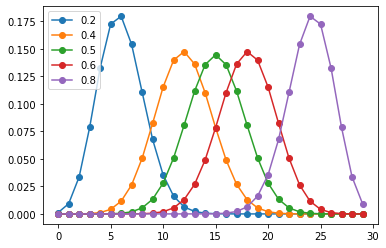

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import math
from scipy.stats import binom
p=np.array([0.2 ,0.4 ,0.5 ,0.6 ,0.8])
n=30
def f (k,n,p):
    return binom.pmf(k,n,p ) #probability mass function
k = np.arange (0 ,30)
for pval in p:
    plt.plot(k,f(k,n,pval),'-o', label = pval)
    plt.legend()

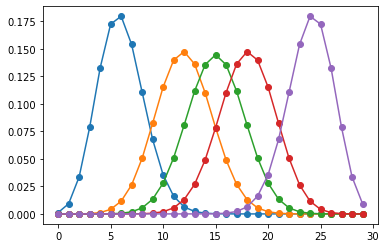

In [2]:
%matplotlib inline
import numpy as np
import math
import matplotlib.pyplot as plt
def factorial(x):
    factorial=1
    for i in range(1,x+1):
        factorial = factorial*i
    return factorial
def binomial(s, p, n):
    binomial = factorial(n) / (factorial(s)*factorial(n-s))*p**s*(1-p)**(n-s)
    return binomial
def binom(s,n,p):
    binom=[]
    for i in s:
        binom.append(binomial(i,n,p))
    return binom
x=np.arange(0,30)
p=np.array([0.2, 0.4, 0.5, 0.6, 0.8])
for pval in p:
    plt.plot(x,binom(x,pval,30),'-o')

Podemos também escrever um código para a visualização da distribuição cumulativa de proba-
bilidades, primeiro usando o scypy:

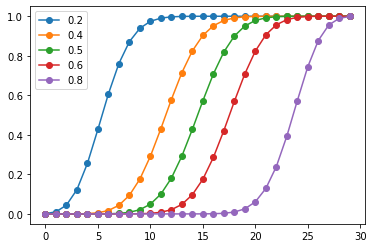

In [3]:
%matplotlib inline
import os
import numpy as np
import math
from scipy.stats import binom # modulo que possui a funcao binomial
import matplotlib.pyplot as plt
p = np.array ([0.2 ,0.4 ,0.5 ,0.6 ,0.8])
n = 30
def f (x ,n ,p):
    return binom.cdf(x, n, p)
x = np.arange(0, 30)
for pval in p :
    plt.plot (x , f (x ,n , pval ) , '-o' , label = pval )
    plt.legend ()

E depois a nossa própria função:

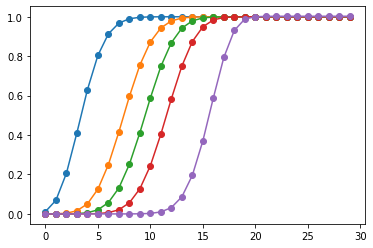

In [4]:
%matplotlib inline
import os
import numpy as np
import math
import matplotlib.pyplot as plt

def factorial(x):
    factorial = 1
    for i in range (1, x+1) :
        factorial = factorial * i
    return factorial

def cumulative (s, p, n):
    cum = 0.0
    c = n
    for j in range (0 ,s+1):
        cum += factorial(c) / (factorial(j) * factorial(c - j)) * p**j * (1 - p)**(c - j)
    return cum

def cumul (s, n, p):
    cumul =[]
    for i in s:
        cumul.append(cumulative(i, n, p))
    return cumul

x = np.arange(0, 30)
p = np.array([0.2, 0.4, 0.5, 0.6, 0.8])
for pval in p:
    plt.plot(x ,cumul(x, pval, 20), '-o')

Em baixo um exemplo de um código para determinar médias, modas e medianas da distribuição binomial:

In [5]:
%matplotlib inline
import os
import numpy as np
import math
import matplotlib.pyplot as plt
import pandas as pd

from scipy.stats import binom # modulo que possui a funcao binomial
def factorial(x):
    factorial = 1
    for i in range (1 , x+1):
        factorial = factorial * i
    return factorial

def binomial (s , p , n):
    binomial = factorial ( n ) / ( factorial ( s ) * factorial (n - s ) ) * p ** s * (1 - p ) **( n - s )
    return binomial

def binom (s ,n , p ) :
    binom =[]
    for i in s:
        binom.append ( binomial (i ,n , p ) )
    return binom
def cumulative (s , p , n ) :
    cum = 0.0
    a = n - s
    c = n
    for j in range (0 , s +1) :
        cum += factorial ( c ) / ( factorial ( j ) * factorial (c - j ) ) * p ** j * (1 - p )**( c - j )
    return cum

def cumul (s ,n , p ) :
    cumul =[]
    for i in s:
        cumul.append(cumulative(i ,n , p))
    return cumul

p = np.array ([0 ,0.2 ,0.4 ,0.5 ,0.6 ,0.8 ,1])
n =39
mode =[]
mediana =[]
medianb =[]
mean =[]
variance =[]
stdev =[]
for pval in p :
    mean1 = n * pval
    mean.append ( mean1 )
    variance1 = n * pval *(1 - pval )
    variance.append ( variance1 )
    stdev1 = round ( math.sqrt ( variance1 ) ,1)
    stdev.append ( stdev1 )
    median1 = math.floor ( n * pval )
    median2 = math.ceil ( n * pval )
    mediana.append ( median1 )
    medianb.append ( median2 )
    if ( n +1) * pval ==0 or ( n +1) * pval != int (( n +1) * pval ) :
        mode1 = math.floor (( n +1) * pval )
        mode2 =0
        mode.append ( round ( mode1 ,1) )
    elif ( n +1) * pval == int (( n +1) * pval ) and ( n +1) * pval <= n :
        mode1 =( n +1) * pval
        mode2 =( n +1) * pval -1
        mode.append ( ' modas :% s ,% s ' %( mode2 , mode1 ) )
    elif ( n +1) * pval == n +1:
        mode1 = n
        mode2 =0
        mode.append ( mode1 )
S = len ( p )
dados = { ' probabilidade ': p , ' media ': mean , ' mediana1 ': mediana , ' mediana2 ': medianb , 
         ' moda ': mode , " variancia " : variance , " desvio padrao " : stdev }
df = pd.DataFrame ( data = dados ) . set_index ( ' probabilidade ')
df

,media,mediana1,mediana2,moda,variancia,desvio padrao
probabilidade,,,,,,
0.0,0.0,0,0,0,0.00,0.0
0.2,7.8,7,8,"modas :7.0 ,8.0",6.24,2.5
0.4,15.6,15,16,"modas :15.0 ,16.0",9.36,3.1
0.5,19.5,19,20,"modas :19.0 ,20.0",9.75,3.1
0.6,23.4,23,24,"modas :23.0 ,24.0",9.36,3.1
0.8,31.2,31,32,"modas :31.0 ,32.0",6.24,2.5
1.0,39.0,39,39,39,0.00,0.0


## 5.4 Distribuição de Poisson.

### 5.4.2 Como criar uma distribuição de Poisson

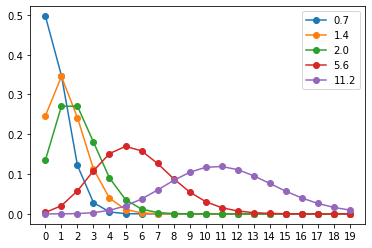

In [6]:
import numpy as np
from scipy.stats import poisson
import matplotlib.pyplot as plt
l=np.array([0.7, 1.4, 2, 5.6, 11.2])
def f(x, l):
    return poisson.pmf(x, l)
x = np.arange(0, 20)
for lval in l:
    plt.plot(x, f(x ,lval), '-o', label = lval)
    plt.legend()
    plt.xticks(np.arange(min(x), max(x) +1, 1.0))

Agora utilizando o nosso próprio código de raiz:

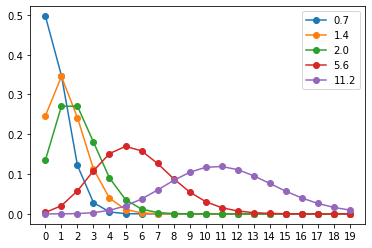

In [7]:
%matplotlib inline
import os
import numpy as np
import math
import matplotlib.pyplot as plt
def factorial ( x ) :
    factorial =1
    for i in range (1 , x +1) :
        factorial = factorial * i
    return factorial
def poisson (x , l ) :
    poisson = l ** x / factorial ( x ) * math.exp ( - l )
    return poisson
def poiss (x , l) :
    poiss =[]
    for i in x :
        poiss.append ( poisson (i , l ))
    return poiss
x = np.arange (0 ,20)
l = np.array ([0.7 ,1.4 ,2 ,5.6 ,11.2])
for lval in l :
    plt.plot (x , poiss (x , lval ) , '-o' , label = lval )
    plt.legend ()
    plt.xticks ( np.arange ( min ( x ) , max ( x ) +1 , 1.0) )

Podemos também escrever um código para a distribuição cumulativa de probabilidades, tanto usando o scipy como um código de raiz.

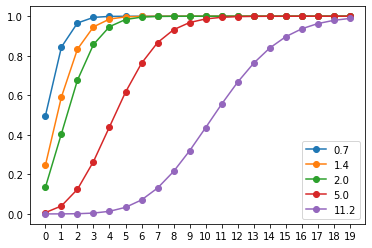

In [8]:
%matplotlib inline
import os
import numpy as np
import math
import matplotlib.pyplot as plt
from scipy.stats import poisson
def factorial(x):
    factorial = 1
    for i in range (1, x+1):
        factorial = factorial * i
    return factorial
def cumulative (x, l):
    cum = 0.0
    for j in range(0 ,x +1):
        cum += l**j / factorial(j) * math.exp(-l)
    return cum
def cumul(x,l):
    cumul = []
    for i in x:
        cumul.append(cumulative(i, l))
    return cumul
x=np.arange(0,20)
l=np.array([0.7, 1.4, 2, 5, 11.2])
for lval in l:
    plt.plot(x, cumul(x, lval), '-o', label=lval)
    plt.legend()
    plt.xticks(np.arange(min(x), max(x)+1, 1.0))

### 5.4.3 Propriedades da distribuição de Poisson.

In [9]:
import pandas as pd

def poisson (x , l ) :
    poisson = l ** x / factorial ( x ) * math . exp ( - l )
    return poisson

def poiss(x, l):
    poiss = []
    for i in x:
        poiss.append(poisson(i, l))
    return poiss

l = np.array([0.7, 1.4, 2, 5.6, 11.2])
S = len(l)
mode = []
median = []
mean = []
variance = []
stdev = []

for lval in l:
    mean1 = lval
    mean.append(mean1)
    variance1 = lval
    variance.append(lval)
    stdev1 = round( math.sqrt( lval ) ,2)
    stdev.append ( stdev1 )
    median1 = math.floor ( lval +1/3 -0.02/ lval )
    if lval != int ( lval ) :
        mode1 = math.floor ( lval )
        mode.append ( mode1 )
    else:
        mode1 = lval
        mode2 = lval -1
        mode.append ( ' modas :% s ,% s ' %( mode2 , mode1 ) )
    median.append ( median1 )
    
dados = { ' lambda ': l , ' media ': mean , ' mediana ': median , ' moda ': mode , "variancia " : variance , 
         " desvio padrao " : stdev }
df = pd.DataFrame ( data = dados ).set_index ( ' lambda ')
df

,media,mediana,moda,variancia,desvio padrao
lambda,,,,,
0.7,0.7,1,0,0.7,0.84
1.4,1.4,1,1,1.4,1.18
2.0,2.0,2,"modas :1.0 ,2.0",2.0,1.41
5.6,5.6,5,5,5.6,2.37
11.2,11.2,11,11,11.2,3.35


## 5.5 Distribuição Normal ou de Gauss.

### 5.5.2 Teorema do Limite Central.

Vamos repetir este processo 20 vezes. Para o efeito vou utilizar a função
random.binomial do numpy, que permite fazer isso mesmo.

No handles with labels found to put in legend.


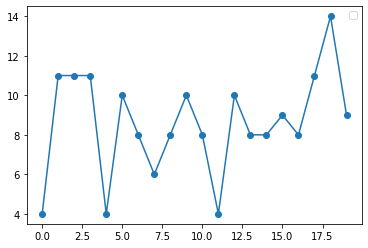

In [10]:
%matplotlib inline
import os
import numpy as np
import math
import matplotlib.pyplot as plt

p =0.21
n =40
dist =[]
i = np.arange(0 ,20 ,1)
for ival in i :
    dist.append( np.random.binomial(n , p ) )
plt.plot(i , dist , '-o')
plt.legend()

Calculemos agora a média destes valores usando o pandas:

In [14]:
import statistics as stat
distrib = pd.DataFrame( dist )
distrib.columns = ['contagem']
m = stat.mean( distrib[ kval ][ ' contagem ' ]) /40
m

NameError: name 'kval' is not defined